In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# overview 
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [16]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

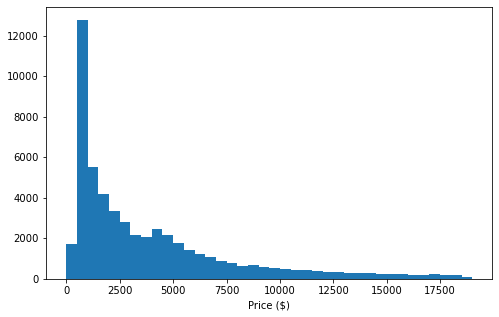

In [30]:
# univariate plot of diamond prices
binsize = 500
bins = np.arange(0, diamonds['price'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price',bins = bins);
plt.xlabel('Price ($)')
plt.show()

In [13]:
np.log10(diamonds['price'].describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

In [41]:
# Get the ticks for bins between [0 - maximum weight]
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(diamonds['price'].max())+log_binsize, log_binsize)

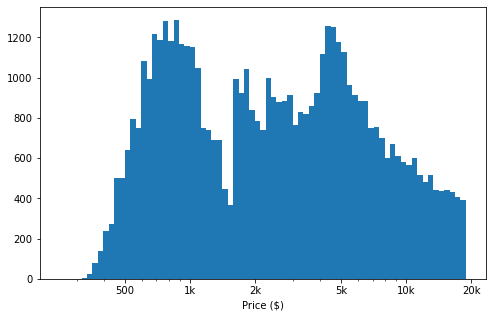

In [42]:
# Plot the histogram
plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)')
plt.show()

Price has a long-tailed distribution, with a lot of diamonds on the low price end, and few on the high price end. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 500 and 1000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up.

> Throughout this case study, you'll see comments in Markdown cells like the one below, where the text has been colored in white. Unlike the exercises in earlier lessons, a reference plot will not be provided: you'll need to assess on your own whether or not your plot matches the comments. To view these comments, you can either highlight the text, or double click the Markdown cell. Remove or change the **style="color:white"** on the text to un-spoiler the commentary.

Price distribution comment 1: <span>You should create a histogram for price, since it is a numeric variable. Your initial plots should show that diamond price follows a highly skewed distribution. If you haven't tried a log scaling, then try that now.</span>

Price distribution comment 2: <span>Under a log scale, you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.</span>

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

In [46]:
diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [51]:
binsize = 0.05
bins = np.arange(0, diamonds['carat'].max()+binsize, binsize)

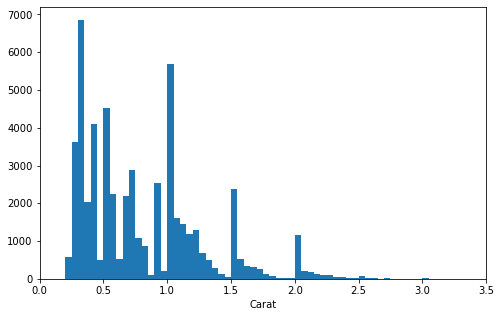

In [54]:
# univariate plot of carat weights
plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim([0,3.5])
plt.xlabel('Carat')
plt.show()

Carat distribution comment: <span>You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions?</span>

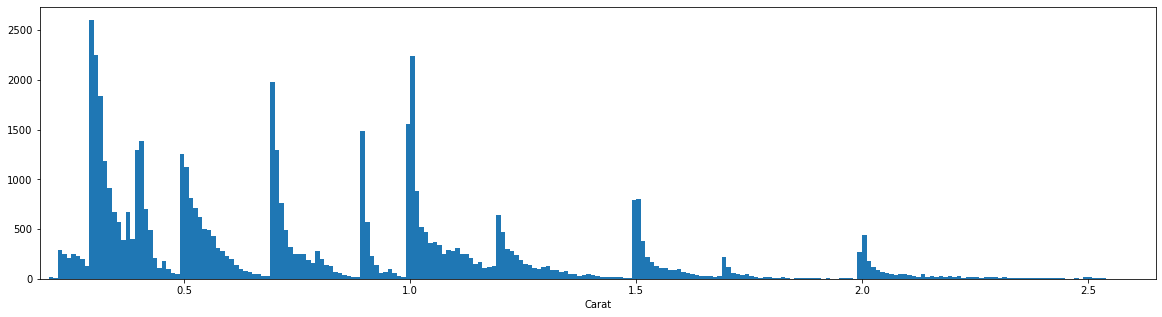

In [61]:
# investigating further on an even smaller bin size
binsize = 0.01
bins = np.arange(0.2, 3, 0.01)

plt.figure(figsize=[20,5])
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim([0.18,2.65])
plt.xlabel('Carat')
plt.show()

In the case of carat, the small bin size proves very illuminating. There are very large spikes in frequency at the bars with one digit of precision (e.g. 0.3, 0.7, 1.0); frequency quickly trails off until the next spike. These probably represent standard diamond sizes for use in jewelry.

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

In [63]:
# univariate plots of cut, color, and clarity grades

diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [64]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [82]:
diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [72]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

In [74]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


General categorical feature comment: <span>Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level. Check the previous page if you need documentation on how the scales are set up, since they're not completely intuitive!</span>

Cut distribution comment: <span>The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.</span>

Color distribution comment: <span>The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. (There are other diamond grades that are worse than J, but they're not part of the collected data.)</span>

Clarity distribution comment: <span>There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).</span>

<AxesSubplot:xlabel='cut', ylabel='count'>

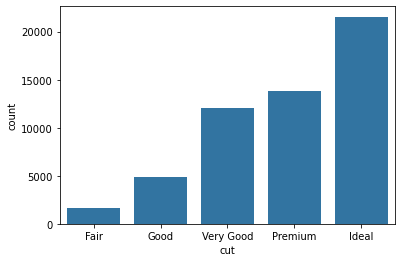

In [79]:
default_color = sb.color_palette()[0]
sb.countplot(data = diamonds, x = 'cut', color = default_color)

<AxesSubplot:xlabel='color', ylabel='count'>

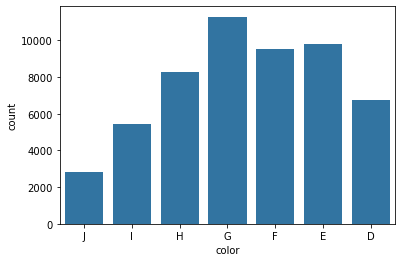

In [80]:
sb.countplot(data = diamonds, x = 'color', color = default_color)

<AxesSubplot:xlabel='clarity', ylabel='count'>

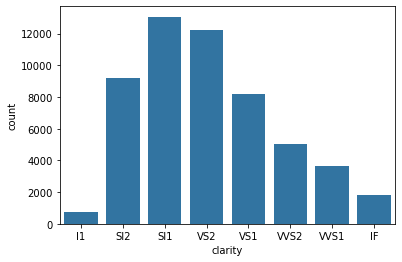

In [81]:
sb.countplot(data = diamonds, x = 'clarity', color = default_color)

The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. Most of the diamonds are also of color quality G or better. Clarity, shows a trend opposite from the other two features, with most of the diamonds on the lower end of the scale, at VS2 or worse. Clarity grades become rarer as steps are taken up the scale.

I'll now look at the other features in the data to see if any of them hold interesting properties.

In [99]:
diamonds[['x', 'y','z']].describe()

,x,y,z
count,53940.000000,53940.000000,53940.000000
mean,5.731157,5.734526,3.538734
std,1.121761,1.142135,0.705699
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


Text(0.5, 0, 'x in mm')

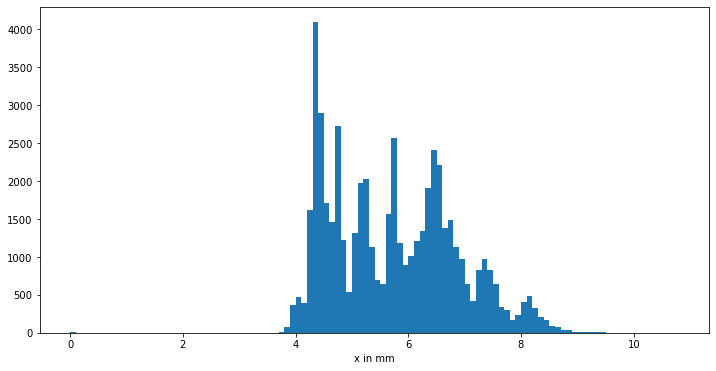

In [114]:
# let's start with the major dimensions of the diamonds, with x, y, and z.

#fig, ax = plt.subplots(nrows=3, figsize = [8,8])

#variables = ['x', 'y', 'z']
#for i in range(len(variables)):
#    var = variables[i]
#    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.2, 0.2)
#    ax[i].hist(data = diamonds, x = var, bins = bins)
#    ax[i].set_xlabel('{} (mm)'.format(var))

#plt.show()

plt.figure(figsize=[12,6])
bins = np.arange(min(diamonds['x']), max(diamonds['x'])+0.1, 0.1)
plt.hist(data = diamonds, x = 'x', bins = bins)
#plt.xlim([3,9.5])
plt.xlabel('x in mm')

Text(0.5, 0, 'y in mm')

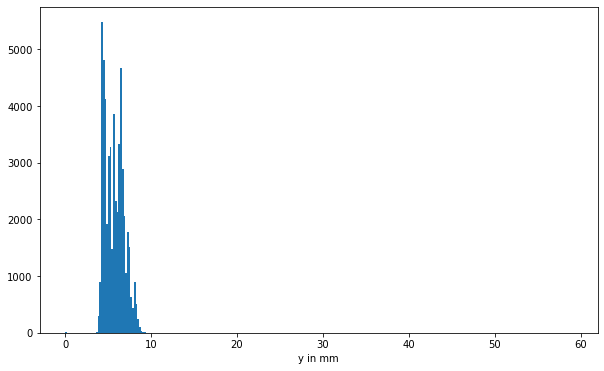

In [121]:
plt.figure(figsize=[10,6])
bins = np.arange(min(diamonds['y']), max(diamonds['y'])+0.2, 0.2)
plt.hist(data = diamonds, x = 'y', bins = bins)
#plt.xlim([3,10])
plt.xlabel('y in mm')

Text(0.5, 0, 'z in mm')

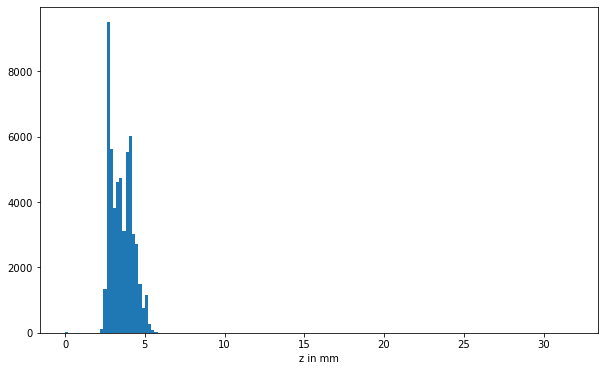

In [118]:
plt.figure(figsize=[10,6])
bins = np.arange(min(diamonds['z']), max(diamonds['z'])+0.2, 0.2)
plt.hist(data = diamonds, x = 'z', bins = bins)
#plt.xlim([1,7])
plt.xlabel('z in mm')

The initial plot of the x, y, and z features show some immediate points of attention. On the y and z plots, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits of all three plots also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [122]:
# select low outliers, using criteria eyeballed from the plots

low_outliers = (diamonds['x'] < 3.5) | (diamonds['y'] < 3.5) | (diamonds['z'] < 2)

print(low_outliers.sum())
print(diamonds.loc[low_outliers,:])

23
       carat        cut color clarity  depth  table  price     x     y     z  \
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.00   
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.00   
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.00   
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.00   
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.00   
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.00   
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.00   
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.00   
14635   1.07      Ideal     F     SI1   60.6   57.0   5909  6.62  6.67  1.07   
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.00   
20694   1.53      Ideal     I     SI1   61.9   54.0   8971  7.43  7.50  1.53   
21654   1.41      Ideal     H     VS1

There are 23 outliers with unusually low values for x, y, or z. Most of them have a 0 value for z, some of them also have a 0 value for x or y. The three diamonds that don't have a 0 value have a z-value that actually matches their carat instead. There might have been an error in data input. Interestingly, these diamonds tend to be fairly high in price, most of them above the median and over half above the third quartile.

In [123]:
# select high outliers, using criteria eyeballed from the plots

high_outliers = ((diamonds['y'] > 10) | (diamonds['z'] > 6))
print(high_outliers.sum())
print(diamonds.loc[high_outliers,:])

15
       carat        cut color clarity  depth  table  price      x      y  \
23644   3.65       Fair     H      I1   67.1   53.0  11668   9.53   9.48   
24067   2.00    Premium     H     SI2   58.9   57.0  12210   8.09  58.90   
24328   3.50      Ideal     H      I1   62.8   57.0  12587   9.65   9.59   
25998   4.01    Premium     I      I1   61.0   61.0  15223  10.14  10.10   
25999   4.01    Premium     J      I1   62.5   62.0  15223  10.02   9.94   
26194   2.01       Fair     G     SI2   65.6   56.0  15562   7.89   7.84   
26431   3.40       Fair     D      I1   66.8   52.0  15964   9.42   9.34   
26444   4.00  Very Good     I      I1   63.3   58.0  15984  10.01   9.94   
26534   3.67    Premium     I      I1   62.4   56.0  16193   9.86   9.81   
27130   4.13       Fair     H      I1   64.8   61.0  17329  10.00   9.85   
27415   5.01       Fair     J      I1   65.5   59.0  18018  10.74  10.54   
27630   4.50       Fair     J      I1   65.8   58.0  18531  10.23  10.16   
27679   3

Most of the high outliers appear to be valid points, with the exception of the three points with extreme values in the y and z variables. As a final outlier check, since 'table' is the ratio of z to the average of x and y ((2\*z)/(x+y)), we can see how many points do not have a matching calculated value.

In [124]:
# select points whose depth value does not match x, y, and z values.

incorrect_depth = (np.abs(2 * diamonds['z'] / (diamonds['x'] + diamonds['y']) - diamonds['depth']/100) > 0.1)
no_size_info = ((diamonds['x'] == 0) & (diamonds['y'] == 0))
print(diamonds.loc[incorrect_depth | no_size_info,['carat','depth','x','y','z']])

       carat  depth     x      y      z
2207    1.00   59.1  6.55   6.48   0.00
2314    1.01   58.1  6.66   6.60   0.00
2941    1.00   62.8  6.26   6.19   3.19
4518    1.00   43.0  6.32   6.27   3.97
4791    1.10   63.0  6.50   6.47   0.00
5471    1.01   59.2  6.50   6.47   0.00
6341    1.00   44.0  6.31   6.24   4.12
10167   1.50   64.0  7.15   7.04   0.00
10377   1.09   43.0  6.53   6.55   4.12
11182   1.07   61.6  0.00   6.62   0.00
11963   1.00   63.3  0.00   0.00   0.00
13601   1.15   59.2  6.88   6.83   0.00
14635   1.07   60.6  6.62   6.67   1.07
15951   1.14   57.5  0.00   0.00   0.00
19502   1.57   67.3  7.85   5.75   3.87
20694   1.53   61.9  7.43   7.50   1.53
21654   1.41   60.7  7.31   7.22   1.41
24067   2.00   58.9  8.09  58.90   8.06
24394   2.18   59.4  8.49   8.45   0.00
24520   1.56   62.2  0.00   0.00   0.00
25849   2.00   59.0  6.16   6.15   4.82
26123   2.25   61.3  8.52   8.42   0.00
26194   2.01   65.6  7.89   7.84   6.16
26243   1.20   62.1  0.00   0.00   0.00


This check captures not only the 26 outliers that were identified above, but a number of other points that had conflicting information. For safety, I'll remove all of these inconsistent points from the data. Then, I'll recreate the plots of x, y, and z.

In [125]:
# remove points with inconsistent depth values.
diamonds = diamonds.loc[-incorrect_depth & -no_size_info,:]

Text(0.5, 0, 'x in mm')

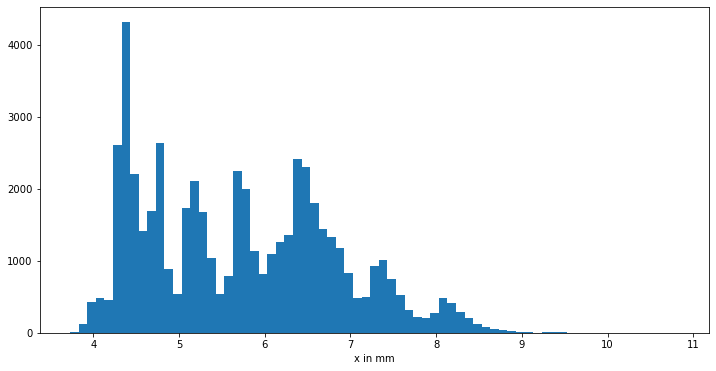

In [126]:
# re-plot the distribution of x, y, and z.
plt.figure(figsize=[12,6])
bins = np.arange(min(diamonds['x']), max(diamonds['x'])+0.1, 0.1)
plt.hist(data = diamonds, x = 'x', bins = bins)
#plt.xlim([3,9.5])
plt.xlabel('x in mm')

Text(0.5, 0, 'y in mm')

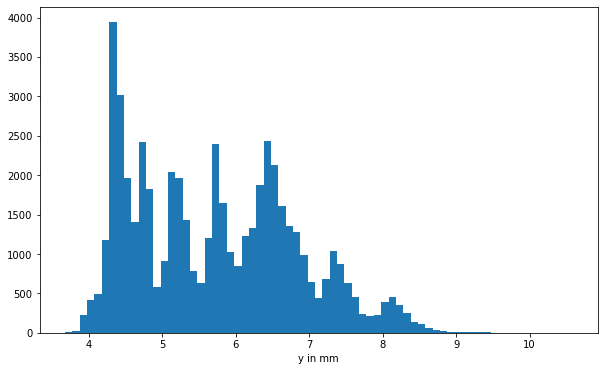

In [130]:
plt.figure(figsize=[10,6])
bins = np.arange(min(diamonds['y']), max(diamonds['y'])+0.1, 0.1)
plt.hist(data = diamonds, x = 'y', bins = bins)
#plt.xlim([3,10])
plt.xlabel('y in mm')

Text(0.5, 0, 'z in mm')

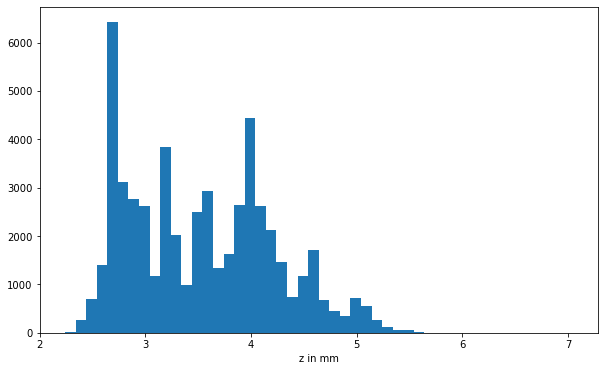

In [129]:
plt.figure(figsize=[10,6])
bins = np.arange(min(diamonds['z']), max(diamonds['z'])+0.1, 0.1)
plt.hist(data = diamonds, x = 'z', bins = bins)
#plt.xlim([1,7])
plt.xlabel('z in mm')

Interestingly, the shape of the x, y, and z distributions are very similar to one another. The z distribution just looks slightly different since it takes a smaller range of values, and so the bins are larger in a relative sense. It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with carat.

Before closing this section, we'll take a look at the last two variables: depth and table.

Text(0.5, 0, 'depth in mm')

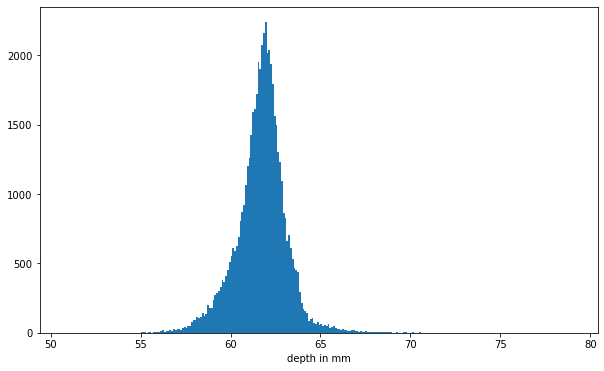

In [131]:
# re-using code to plot depth and table.
plt.figure(figsize=[10,6])
bins = np.arange(min(diamonds['depth']), max(diamonds['depth'])+0.1, 0.1)
plt.hist(data = diamonds, x = 'depth', bins = bins)
#plt.xlim([1,7])
plt.xlabel('depth in mm')

Text(0.5, 0, 'table in mm')

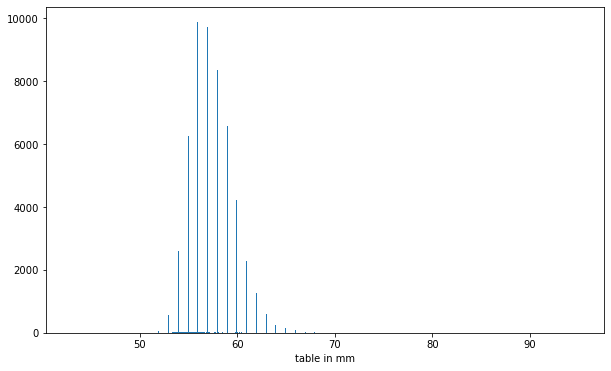

In [132]:
# re-using code to plot depth and table.
plt.figure(figsize=[10,6])
bins = np.arange(min(diamonds['table']), max(diamonds['table'])+0.1, 0.1)
plt.hist(data = diamonds, x = 'table', bins = bins)
#plt.xlim([1,7])
plt.xlabel('table in mm')

Both table and depth are unimodal, but the distributions are slightly skewed and look a little narrower than a normal distribution. Table is slightly skewed right, while depth is slightly skewed left; I wonder if they're negatively correlated. Table is also a discrete numeric variable.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between \$500 and \$1000, and another just below \$5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the x, y, and z size variables, a number of outlier points were identified. Overall, these points can be characterized by an inconsistency between the recorded value of depth, and the value that would be derived from using x, y, and z. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [133]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']

<AxesSubplot:>

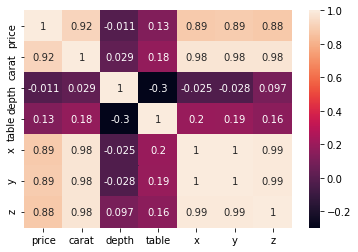

In [134]:
sb.heatmap(diamonds[numeric_vars].corr(), annot = True)

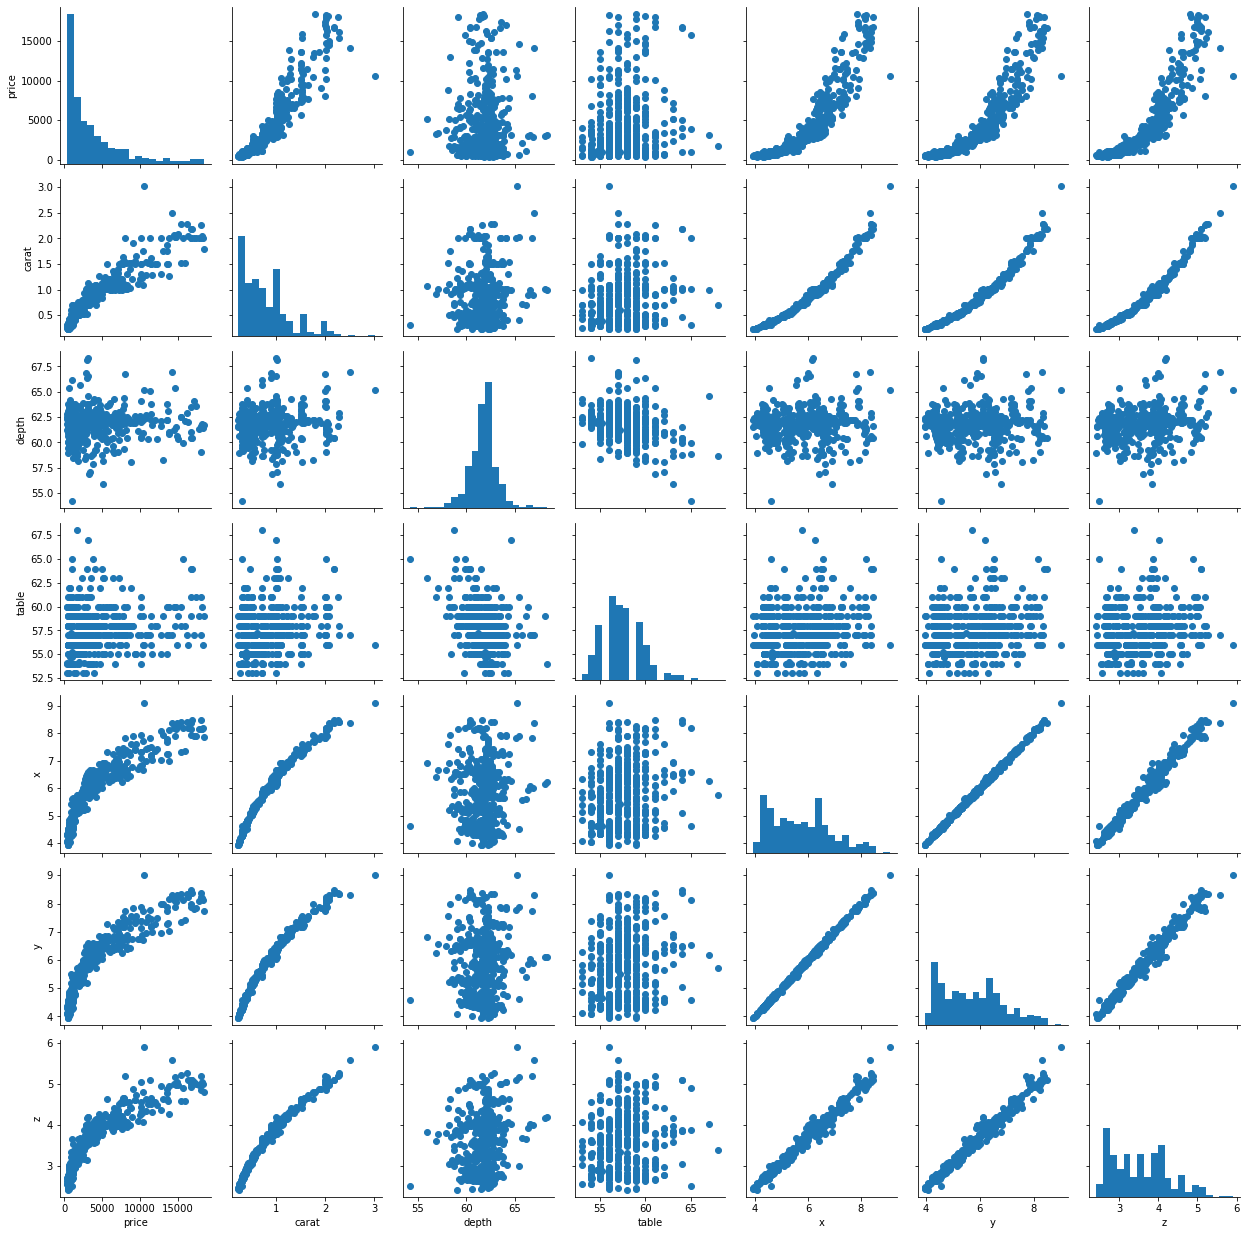

In [135]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(diamonds.shape[0], 500, replace = False)
diamonds_samp = diamonds.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, the 'x', 'y', and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.

Surprisingly, the correlation coefficient between price and carat is very high, despite the fact that price has such a large range of values. This will be worth extra exploration in this section. Depth and table don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized in the previous section. I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.

Let's move on to looking at how price and carat weight correlate with the categorical variables.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


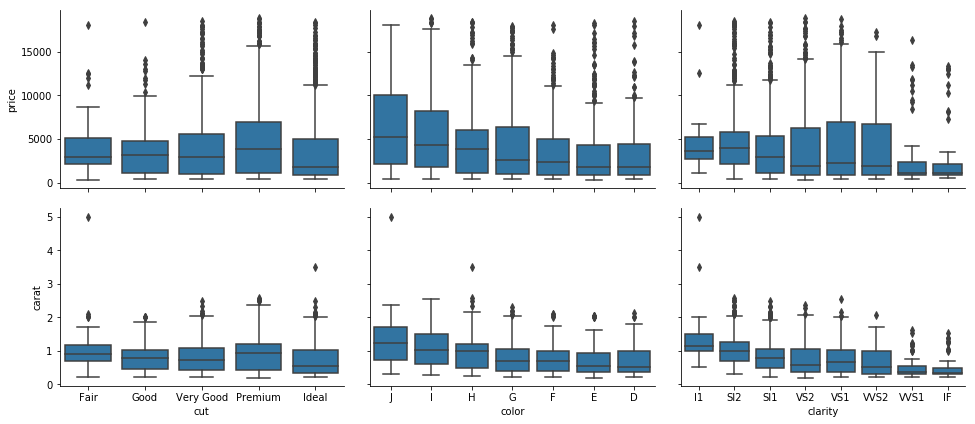

In [21]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
diamonds_samp = diamonds.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = ['price', 'carat'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Interestingly, it appears that there are some negative relationships between the categorical variables and the two numeric variables of interest. The diamonds with the best features (Ideal cut, color D, clarity IF) seem to get the lowest prices, but also tend to be smaller on average. This will be worth investigating more later on, using the full data.

Finally, let's look at relationships between the three categorical features.

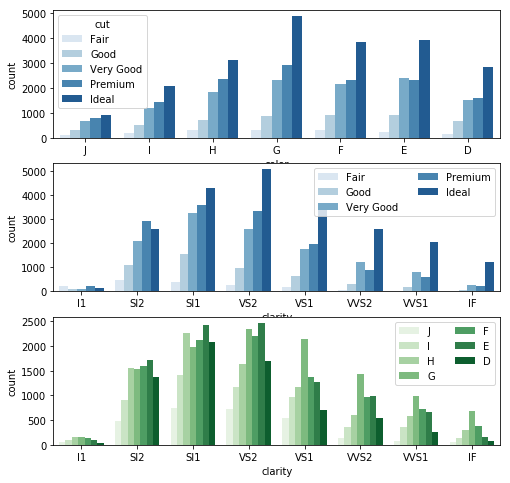

In [22]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = diamonds, x = 'color', hue = 'cut', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = diamonds, x = 'clarity', hue = 'cut', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = diamonds, x = 'clarity', hue = 'color', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

There doesn't seem to be that much interaction between diamond color and cut, though proportionally it seems like there might be more "Very Good" and "Premium" diamonds on the better color grades (F, E, and D). There are slightly larger interactions on the clarity grades, especially the lower levels of SI2, SI1, and VS2. It looks like there are more Very Good and Premium cut diamonds and more G, F, and E color diamonds compared to higher clarity grades.

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how price and carat are related to one another for all of the data, and to plot price on a log scale.

In the previous notebook, you looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

Price vs. Carat comment 1: Since these are both numeric variables, a scatterplot is a natural choice. You might also consider a heat map for this task. In either case, you should recall that the price distribution suggests a logarithmic transformation due to its very long tail. If you haven't tried it yet, add a transformation to the price axis.

Text(0, 0.5, 'Price ($)')

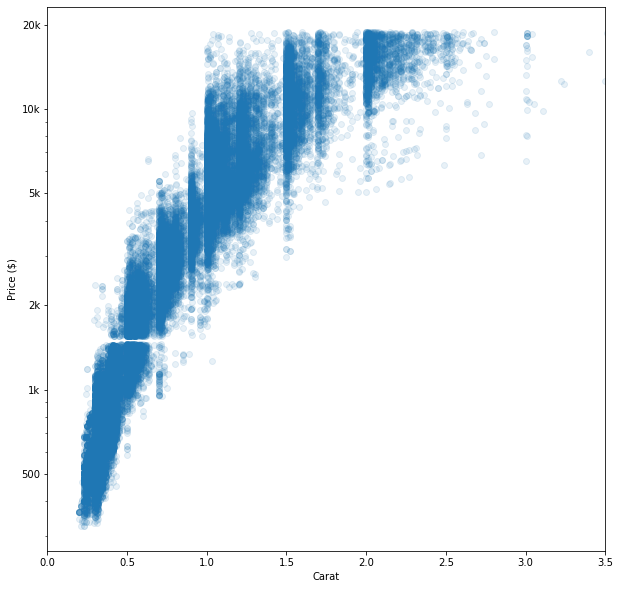

In [97]:
# bivariate plot of price vs. carat
plt.figure(figsize = [10, 10])
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha=1/10)
plt.xlim([0, 3.5])
plt.xlabel('Carat')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

Price vs. Carat comment 2: Assuming that you put price on the y-axis and carat on the x-axis, the transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend, wouldn't it? It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

In [93]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [95]:
diamonds['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [94]:
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)
diamonds['cr_carat'].describe()

count    53940.000000
mean         0.893508
std          0.175452
min          0.584804
25%          0.736806
50%          0.887904
75%          1.013159
max          1.711115
Name: cr_carat, dtype: float64

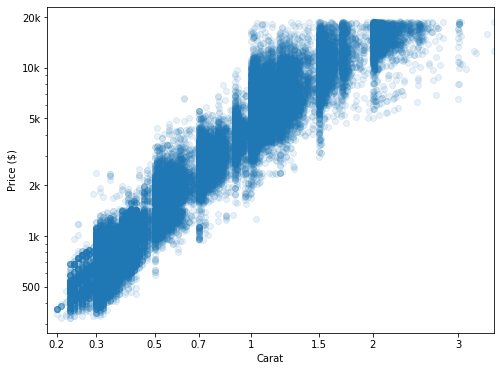

In [96]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 1/10)

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

plt.show()

Price vs. Carat comment 3: One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

In [27]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

diamonds['log_price'] = diamonds['price'].apply(log_trans)

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

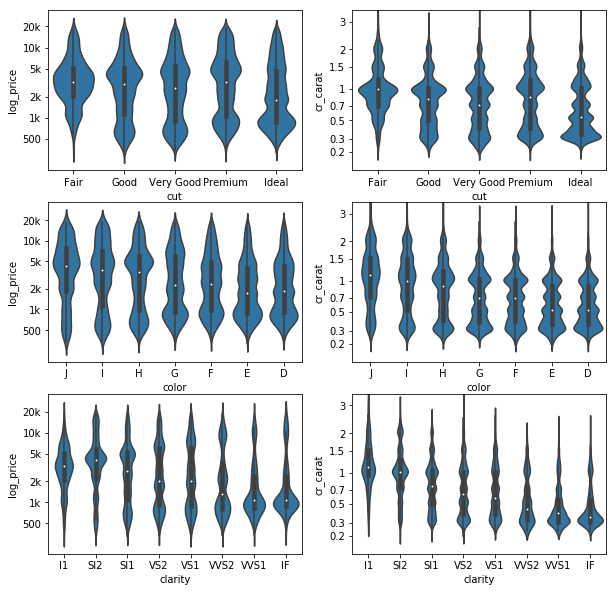

In [28]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = diamonds, x = var, y = 'log_price', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sb.violinplot(data = diamonds, x = var, y = 'cr_carat', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_yticks(cuberoot_trans(np.array(carat_ticks)))
    ax[i,1].set_yticklabels(carat_ticks)
    ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

plt.show()

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the decrease in average price across increasing quality is due to the average diamond size decreasing with increasing quality. This is clearest in the plots across clarity, moderately visible with cut, and least evident with color. It will be interesting to see how the categories map in the multivariate analysis.

Price vs. Categorical comment 1: <span>There's a lot of different approaches you could have taken here. If you created a box plot, then you probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. Is there a different plot type to choose that shows more details in the data?</span>

Price vs. Categorical comment 2: <span>With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.</span>

Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

In [ ]:
# bivariate plots of carat vs. cut, color, clarity


Carat vs. Categorical comment: <span>These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.</span>

## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

In [ ]:
# multivariate plot of price by carat weight, and clarity


Price by Carat and Clarity Comment 1: <span>With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.</span>

Price by Carat and Clarity Comment 2: <span>You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?</span>

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [ ]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds


Price by Cut and Color Comment 1: <span>There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.</span>

Price by Cut and Color Comment 2: <span>Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out? </span>

## Explanatory Polishing

Through the last few workbooks, you've performed an exploration of a dataset relating the price of diamonds to their four 'C' attributes: carat, cut, color, and clarity. During that exploration, you found that the primary driver of price was carat weight, where the log of price was approximately linearly related to the cube root of carat weight, analogous to the diamond's length, width, or depth. The price was then modified by the diamond's cut, color, and clarity grades.

In this workbook, you'll polish two plots from the earlier exploration so that they can be presented to others in an understandable form.

The first plot to polish depicts the base relationship between price and carat. Make additions and revisions to the code below to refine the given plot.

In [4]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

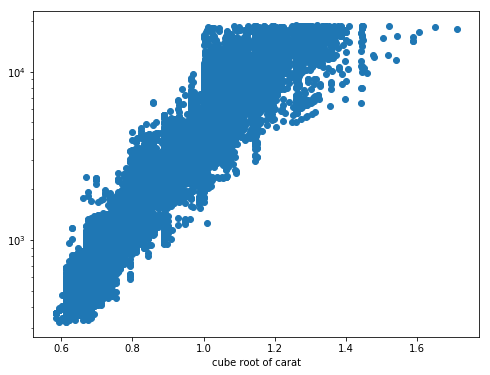

In [5]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])

plt.scatter(data = diamonds, x = 'cr_carat', y = 'price')

plt.xlabel('cube root of carat')

plt.yscale('log')

plt.show()

Price vs. Carat Polishing comment 1: Use the following list to make sure you've checked the major points of revision in this plot.
- <span>Does the plot has an informative title?</span>
- <span>Are the axis labels informative?</span>
- <span>Are the tick values interpretable?</span>
- <span>Do we need to worry about any of the plot aesthetics?</span>

Price vs. Carat Polishing comment 2: Here are some specific comments on the polishing of the plot.

- <span>The original plot's vertical axis only has two tick marks, and they're in scientific notation. Not only is it not clear that the data is on a power scale, it's also difficult to parse. We can solve both of these problems by specifying the tick marks. Take advantage of the 1-2-5-10 sequence to set which tick marks to show.</span>
- <span>As for the horizontal axis, the values are in terms of the cube-root transformed values, rather than in raw carat values. This presents an obstacle to interpretability. Once again, we should specify tick locations: the peaks observed in the univariate distribution might be good choices. Note that we also need to make use of the cuberoot_trans() function since the transformation is non-standard.</span>
- <span>There's a lot of overplotting in the scatterplot as given. Try playing with the alpha parameter to try and make the main trend stand out more.</span>

The second plot that you will polish is a multivariate plot of price against levels of color and cut, for diamonds of about 1 carat weight. Make additions and revisions to the code below to refine the given plot.

In [1]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

NameError: name 'diamonds' is not defined

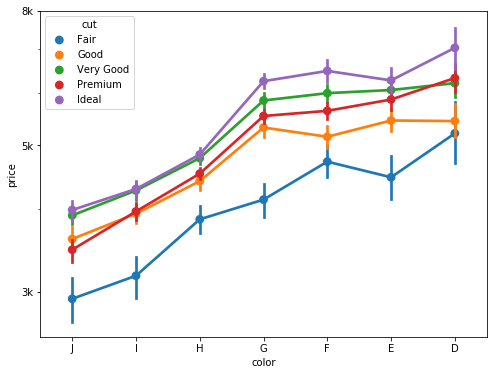

In [7]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = diamonds_1c, x = 'color', y = 'price', hue = 'cut')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000], ['3k', '5k', '8k'])
ax.set_yticklabels([], minor = True)

plt.show();

Price vs. Color, Cut: Polishing comment 1: <span> Don't forget to provide an informative title and axis labels.</span>

Price vs. Color, Cut: Polishing comment 2: <span> There's a few things with the pointplot function that we can revise. First of all, the default color palette used is qualitative, but we should probably choose a sequential palette instead. We could also stand to add a dodge parameter so that the points aren't stacked directly on top of one another and to make individual points easier to read. One other possible modification we could add is to remove the line connecting points on each level of cut: with the other changes made, removing the connecting line can help reduce the ink used, cleaning up the presentation.</span>

> If you want to check your work on the case study against a reference, take a look at the example project in the [Resources](https://video.udacity-data.com/topher/2021/May/60a8045e_communicate-data-example-project/communicate-data-example-project.zip)! The example project is based on the same diamonds dataset, and all of the plots that you've worked on in this lesson are also covered there.